## Importing libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Getting data  

In [2]:
path = 'dataset/laptopData.csv'

data = pd.read_csv(path)
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Checking and Cleaning data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [4]:
data.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


### Counting `NAN` values 

In [5]:
data.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

#### This data have lot of `NULL` values
We will drop the values

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

now, Check **duplicates** values 

In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1273, dtype: bool

In [9]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Let's find unique values

In [10]:
data['Company'].unique().tolist()

['Apple',
 'HP',
 'Acer',
 'Asus',
 'Dell',
 'Lenovo',
 'Chuwi',
 'MSI',
 'Microsoft',
 'Toshiba',
 'Huawei',
 'Xiaomi',
 'Vero',
 'Razer',
 'Mediacom',
 'Samsung',
 'Google',
 'Fujitsu',
 'LG']

In [11]:
data.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [12]:
data.OpSys.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

## Visualization

C:\Users\Falcon\AppData\Local\Temp\ipykernel_7972\4244922584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Price)


<Axes: xlabel='Price', ylabel='Density'>

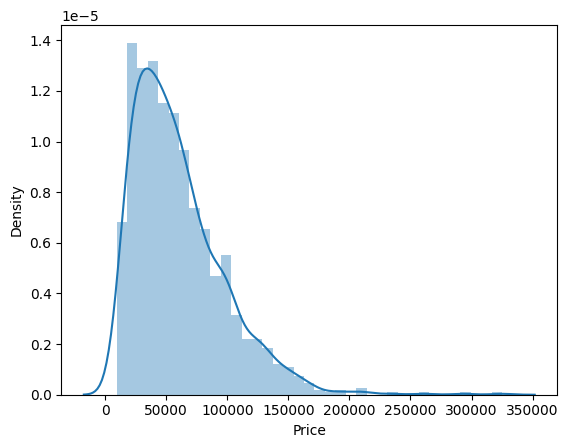

In [13]:
sns.distplot(data.Price)

<Axes: xlabel='Company'>

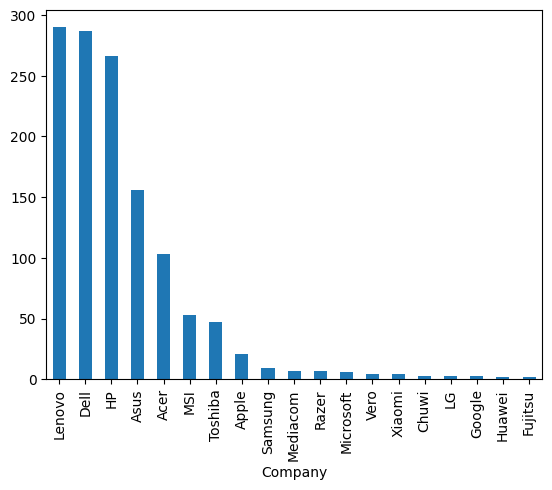

In [14]:
data['Company'].value_counts().plot(kind='bar')

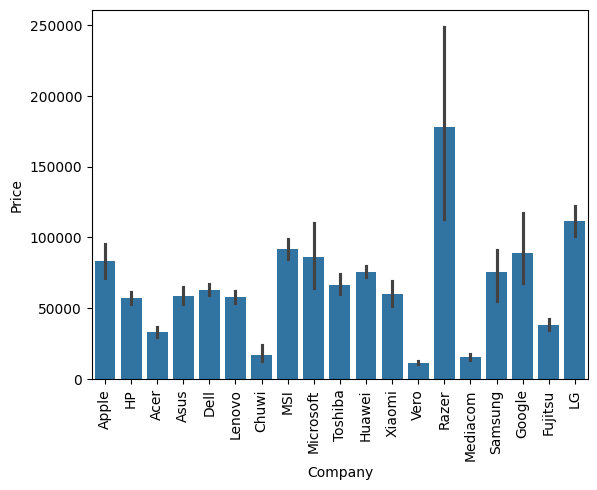

In [15]:
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

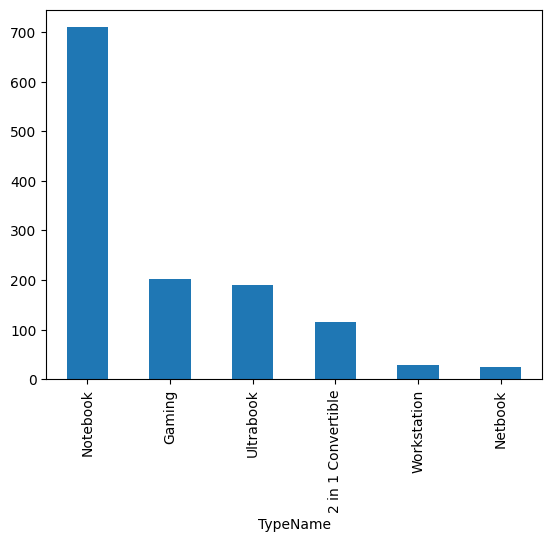

In [16]:
data['TypeName'].value_counts().plot(kind='bar')

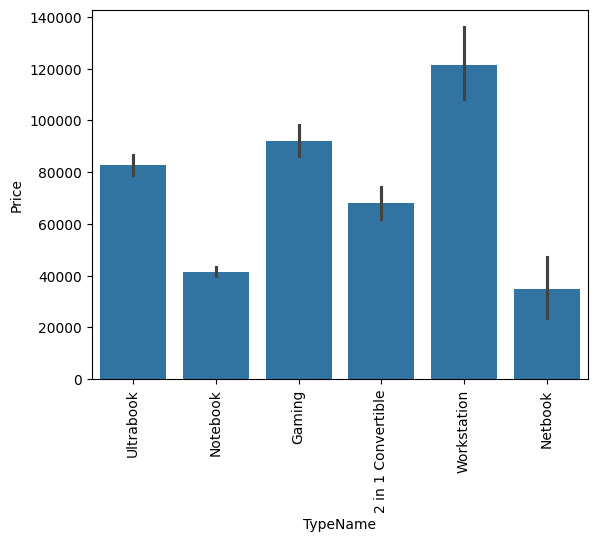

In [17]:
sns.barplot(x=data['TypeName'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [18]:
data['Inches'].isnull().sum()

np.int64(0)

In [19]:
data['Inches'] = data['Inches'].replace('?',np.nan)

In [20]:
data['Inches'].isnull().sum()

np.int64(1)

In [21]:
data = data.dropna()

In [22]:
data['Inches'].astype('float')

0       13.3
1       13.3
2       15.6
3       15.4
4       13.3
        ... 
1298    14.0
1299    13.3
1300    14.0
1301    15.6
1302    15.6
Name: Inches, Length: 1272, dtype: float64

C:\Users\Falcon\AppData\Local\Temp\ipykernel_7972\1445398758.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

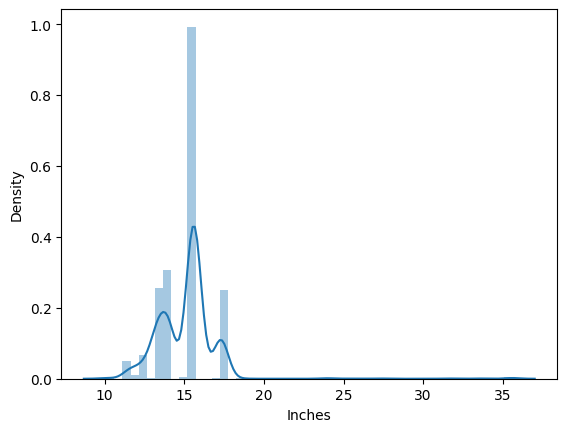

In [23]:
sns.distplot(data['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

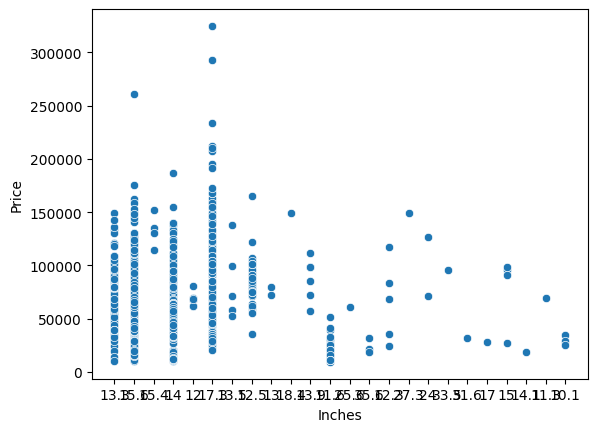

In [24]:
sns.scatterplot(x=data['Inches'], y=data['Price'])

<Axes: ylabel='Inches'>

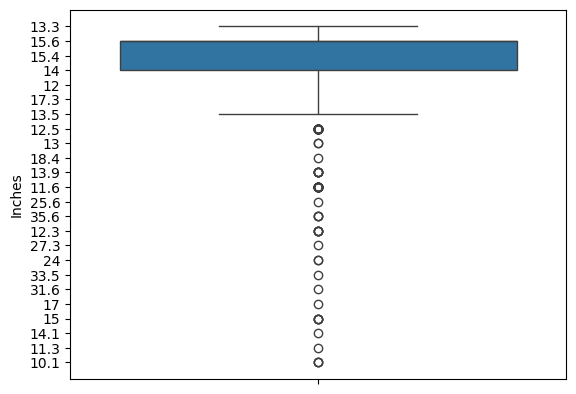

In [25]:
sns.boxplot(data['Inches'])

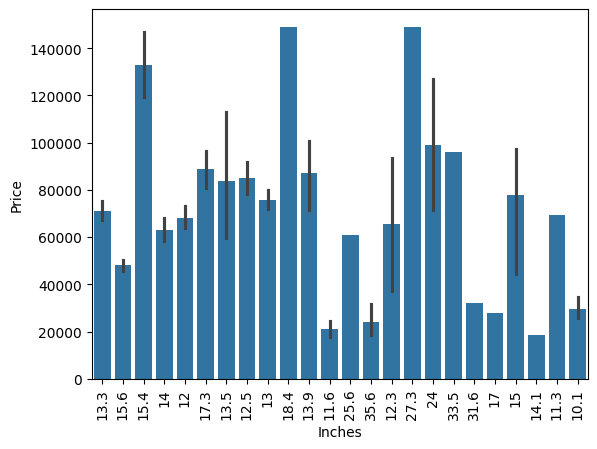

In [26]:
sns.barplot(x=data['Inches'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### Target variable `Price` may be vary on inches. but inches have lot of outliers. Let seee what can we do. 

In [27]:
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                494
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

## Feature engineering 

As we can see there are lot of information in `ScreenResolution` column like `Touchscreen`, `IPS Panel`, `Resolution`, `HD ` etc. So, now we perform some **feature Engineering** to make new column from old ones that help our model to predict better or more accurate 

In [28]:
data['TouchScreen'] = data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [29]:
data['TouchScreen']

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: TouchScreen, Length: 1272, dtype: int64

In [30]:
data.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
472,472.0,Google,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i5 7Y57 1.2GHz,8GB,128GB SSD,Intel HD Graphics 615,Chrome OS,1.1kg,67932.0000,1
788,788.0,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.2kg,122490.7200,0
216,216.0,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 940MX,No OS,2.8kg,31381.9200,0
864,864.0,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,119347.2000,1
66,66.0,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,AMD Radeon 520,Windows 10,1.86kg,23373.4032,0


<Axes: xlabel='TouchScreen'>

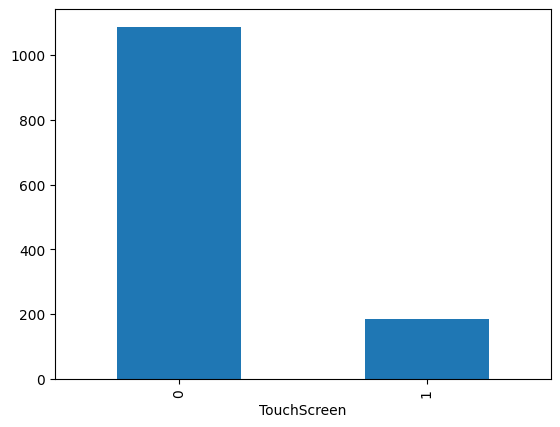

In [31]:
data.TouchScreen.value_counts().plot(kind='bar')

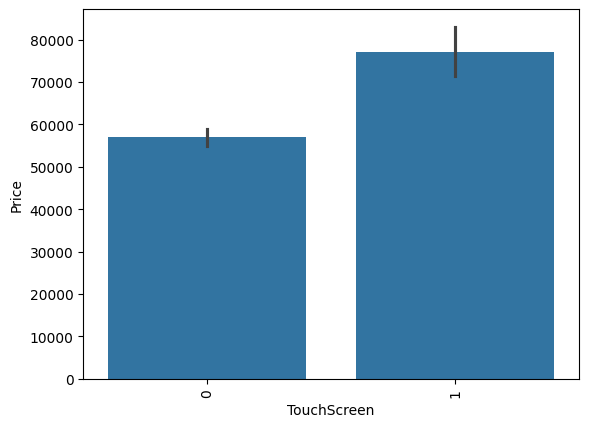

In [32]:
sns.barplot(x=data['TouchScreen'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Now, extract Is laptop has `IPS Panel`  

In [33]:
data['IPS'] = data['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)

In [34]:
data.sample()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
464,464.0,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8GB,256GB SSD,Nvidia Quadro M2200M,Windows 10,2.67kg,111355.2,0,0


In [35]:
data.IPS.value_counts()

IPS
0    913
1    359
Name: count, dtype: int64

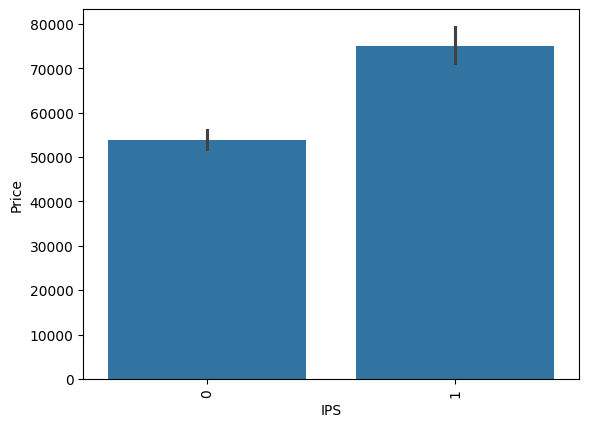

In [36]:
sns.barplot(x=data.IPS, y=data.Price)
plt.xticks(rotation='vertical')
plt.show()

In [37]:
temp = data['ScreenResolution'].str.split('x',n=1,expand=True)

In [38]:
temp[0]

0               IPS Panel Retina Display 2560
1                                        1440
2                                Full HD 1920
3               IPS Panel Retina Display 2880
4               IPS Panel Retina Display 2560
                        ...                  
1298     IPS Panel Full HD / Touchscreen 1920
1299    IPS Panel Quad HD+ / Touchscreen 3200
1300                                     1366
1301                                     1366
1302                                     1366
Name: 0, Length: 1272, dtype: object

In [39]:
data['X_res'] = temp[0]
data['Y_res'] = temp[1]

In [40]:
data['X_res']

0               IPS Panel Retina Display 2560
1                                        1440
2                                Full HD 1920
3               IPS Panel Retina Display 2880
4               IPS Panel Retina Display 2560
                        ...                  
1298     IPS Panel Full HD / Touchscreen 1920
1299    IPS Panel Quad HD+ / Touchscreen 3200
1300                                     1366
1301                                     1366
1302                                     1366
Name: X_res, Length: 1272, dtype: object

In [41]:
data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [42]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1272 non-null   float64
 1   Company           1272 non-null   object 
 2   TypeName          1272 non-null   object 
 3   Inches            1272 non-null   object 
 4   ScreenResolution  1272 non-null   object 
 5   Cpu               1272 non-null   object 
 6   Ram               1272 non-null   object 
 7   Memory            1272 non-null   object 
 8   Gpu               1272 non-null   object 
 9   OpSys             1272 non-null   object 
 10  Weight            1272 non-null   object 
 11  Price             1272 non-null   float64
 12  TouchScreen       1272 non-null   int64  
 13  IPS               1272 non-null   int64  
 14  X_res             1272 non-null   object 
 15  Y_res             1272 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory usag

## Changing the data type 

In [44]:
data['X_res']=data['X_res'].astype('int')
data['Y_res']=data['Y_res'].astype('int')
data['Inches']=data['Inches'].astype('float')


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1272 non-null   float64
 1   Company           1272 non-null   object 
 2   TypeName          1272 non-null   object 
 3   Inches            1272 non-null   float64
 4   ScreenResolution  1272 non-null   object 
 5   Cpu               1272 non-null   object 
 6   Ram               1272 non-null   object 
 7   Memory            1272 non-null   object 
 8   Gpu               1272 non-null   object 
 9   OpSys             1272 non-null   object 
 10  Weight            1272 non-null   object 
 11  Price             1272 non-null   float64
 12  TouchScreen       1272 non-null   int64  
 13  IPS               1272 non-null   int64  
 14  X_res             1272 non-null   int64  
 15  Y_res             1272 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory usage

## Let's change ram and Weight

In [46]:
data[['Ram','Weight']].head()

,Ram,Weight
0,8GB,1.37kg
1,8GB,1.34kg
2,8GB,1.86kg
3,16GB,1.83kg
4,8GB,1.37kg


In [47]:
data['Ram']=data['Ram'].str.replace('GB','')

In [48]:
data['Weight']=data['Weight'].str.replace('kg','')

In [49]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


#### Change the data type of `Ram` and `Weight`

In [50]:
data['Ram']=data['Ram'].astype('int')
# data['Weight']=data['Weight'].astype('float')

In [51]:
data['Weight']=data['Weight'].replace('?',np.nan)

In [52]:
data['Weight'].isnull().sum()

np.int64(1)

In [53]:
data['Weight'].dropna()

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298     1.8
1299     1.3
1300     1.5
1301    2.19
1302     2.2
Name: Weight, Length: 1271, dtype: object

In [54]:
data['Weight']=data['Weight'].astype('float')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1272 non-null   float64
 1   Company           1272 non-null   object 
 2   TypeName          1272 non-null   object 
 3   Inches            1272 non-null   float64
 4   ScreenResolution  1272 non-null   object 
 5   Cpu               1272 non-null   object 
 6   Ram               1272 non-null   int64  
 7   Memory            1272 non-null   object 
 8   Gpu               1272 non-null   object 
 9   OpSys             1272 non-null   object 
 10  Weight            1271 non-null   float64
 11  Price             1272 non-null   float64
 12  TouchScreen       1272 non-null   int64  
 13  IPS               1272 non-null   int64  
 14  X_res             1272 non-null   int64  
 15  Y_res             1272 non-null   int64  
dtypes: float64(4), int64(5), object(7)
memory usage

#### Finding correlation

In [56]:
numeric_cols = data.select_dtypes(include='number')
numeric_cols.corr()['Price']

Unnamed: 0     0.066172
Inches         0.044681
Ram            0.686675
Weight         0.176701
Price          1.000000
TouchScreen    0.189851
IPS            0.256131
X_res          0.558218
Y_res          0.554753
Name: Price, dtype: float64

In [57]:
data['PPI'] = (((data['X_res']**2) + (data['Y_res']**2))** 0.5 / data.Inches).astype('float')

In [58]:
numeric_cols = data.select_dtypes(include='number')
numeric_cols.corr()['Price']

Unnamed: 0     0.066172
Inches         0.044681
Ram            0.686675
Weight         0.176701
Price          1.000000
TouchScreen    0.189851
IPS            0.256131
X_res          0.558218
Y_res          0.554753
PPI            0.469417
Name: Price, dtype: float64

#### We get evrything from `ScreenResolution`. So, We are going to drop that column.

In [59]:
data.drop('ScreenResolution',axis=1,inplace=True)

In [60]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,0.0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,1.0,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,2.0,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,3.0,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,4.0,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [61]:
data.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [62]:
data.head()

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,0.0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,1.0,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,2.0,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,3.0,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,4.0,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [63]:
data.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       183
Intel Core i7 7700HQ 2.8GHz      141
Intel Core i7 7500U 2.7GHz       128
Intel Core i7 8550U 1.8GHz        72
Intel Core i5 8250U 1.6GHz        68
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

#### In `CPU` columns, we are going to make it simple. we use only 5 categories in this column
1. Intel Core i7
2. Intel Core i5
3. Intel Core i3
4. Other Intel
5. AMD 

In [64]:
data['Cpu Name'] = data['Cpu'].apply(lambda x:' '.join(x.split()[:3]))

In [65]:
data.head()

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu Name
0,0.0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,1.0,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,2.0,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,3.0,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,4.0,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [66]:
# function for storing Cpu name in above categoies 
def fetch_processor(cpu):
    if cpu == 'Intel Core i7' or cpu == 'Intel Core i5' or cpu == 'Intel Core i3':
        return cpu
    elif cpu.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [67]:
data['Cpu brand'] = data['Cpu Name'].apply(fetch_processor)

In [68]:
data.head()

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu Name,Cpu brand
0,0.0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,1.0,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,2.0,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,3.0,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,4.0,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [69]:
data.sample(5)

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu Name,Cpu brand
1152,1152.0,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,8,1TB HDD,AMD Radeon R5 M330,No OS,2.32,31914.720,0,0,141.211998,Intel Core i5,Intel Core i5
408,408.0,Lenovo,Notebook,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.20,21791.520,0,0,61.879415,Intel Core i3,Intel Core i3
952,952.0,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,77788.800,0,0,165.632118,Intel Core i5,Intel Core i5
192,192.0,Xiaomi,Ultrabook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,1.30,53274.672,0,1,165.632118,Intel Core i5,Intel Core i5
1058,1058.0,Dell,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,12,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,69210.720,1,1,165.632118,Intel Core i7,Intel Core i7


In [70]:
data['Cpu brand'].value_counts()

Cpu brand
Intel Core i7            514
Intel Core i5            410
Other Intel Processor    151
Intel Core i3            134
AMD Processor             63
Name: count, dtype: int64

<Axes: xlabel='Cpu brand'>

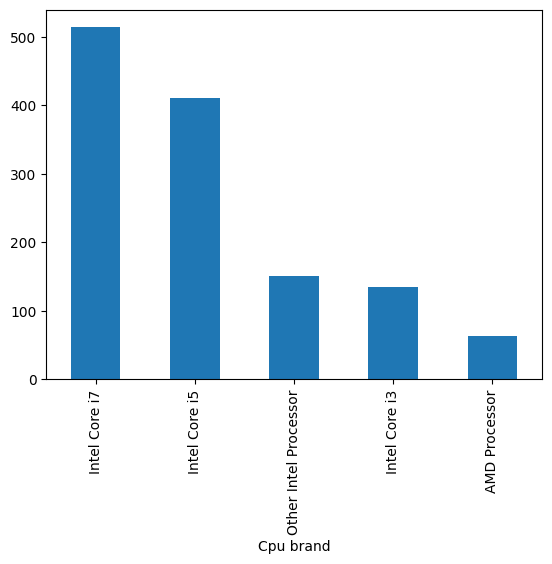

In [71]:
# VIsualization 
data['Cpu brand'].value_counts().plot(kind='bar')

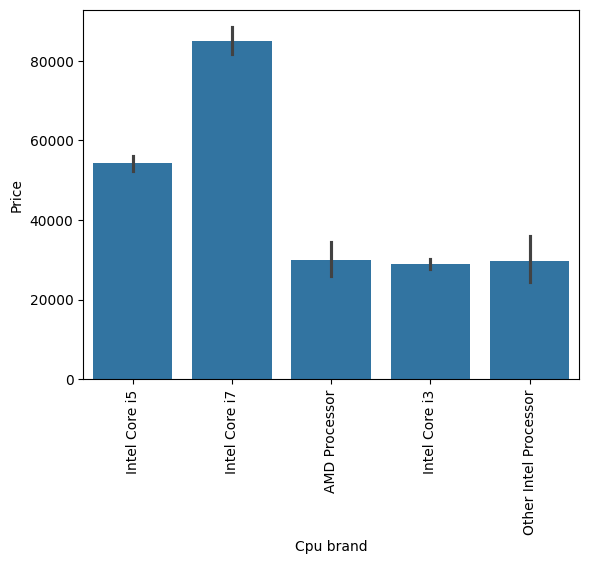

In [72]:
sns.barplot(x=data['Cpu brand'], y=data['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

Dropping extra columns `Cpu` or `Cpu Name` 

In [73]:
data.drop(columns = ['Cpu','Cpu Name'],inplace=True)

In [74]:
data.head()

,Unnamed: 0,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand
0,0.0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,1.0,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,2.0,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,3.0,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,4.0,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

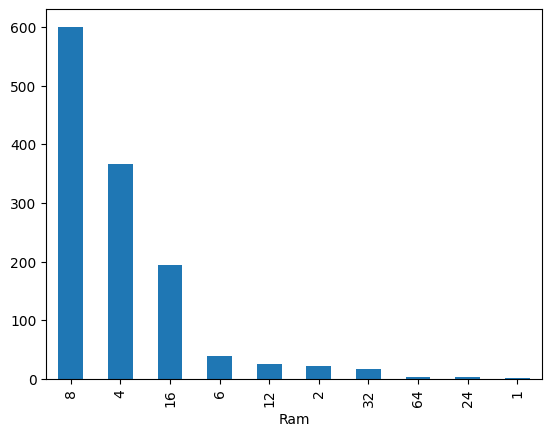

In [75]:
data['Ram'].value_counts().plot(kind='bar')

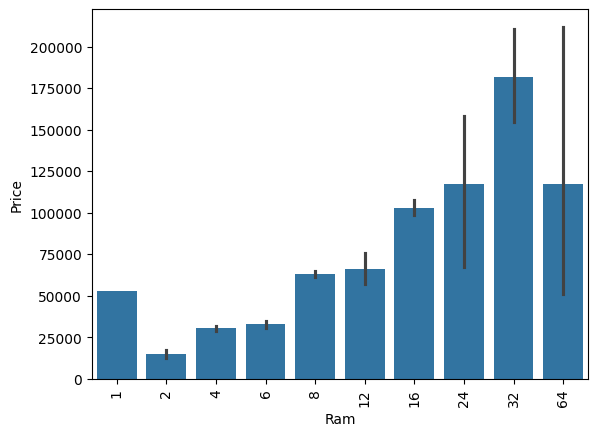

In [76]:
sns.barplot(x=data['Ram'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [77]:
data.Memory.value_counts()

Memory
256GB SSD                        400
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
512GB SSD +  512GB SSD         

Making new columns from `Memory` columns
1. HDD
2. SSD
3. Flash Storage
4. hybrid

In [78]:
data['Memory'] = data['Memory'].astype(str).replace('\.0','',regex=True)
data['Memory'] = data['Memory'].str.replace('GB','') #replacing Gb with '' because values will count in gbs
data['Memory'] = data['Memory'].str.replace('TB','000') # because 1TB = 1000GB

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Falcon\AppData\Local\Temp\ipykernel_7972\2886337688.py:1: SyntaxWarning: invalid escape sequence '\.'
  data['Memory'] = data['Memory'].astype(str).replace('\.0','',regex=True)


In [79]:
data['Memory'].sample(5)

932    1000 HDD
604    1000 HDD
24      256 SSD
45      256 SSD
105     256 SSD
Name: Memory, dtype: object

In [80]:
new = data['Memory'].str.split('+',n=1,expand=True) # 256GB SSD +  1TB HDD splitting by '+' sign

In [81]:
data['first'] = new[0] # storing   '256GB SSD'   part from   ~ 256GB SSD +  1TB HDD ~  this section
data['first'] = data['first'].str.strip() # removing white space

In [82]:
data['second'] = new [1] # storing   '1TB HDD'   part from   ~ 256GB SSD +  1TB HDD ~  this section

In [83]:
data['Layer1HDD'] = data['first'].apply(lambda x: 1 if 'HDD' in x else 0) #add 1 if HDD present in laptop or 0 if not
data['Layer2SSD'] = data['first'].apply(lambda x: 1 if 'SSD' in x else 0) #add 1 if SSD present in laptop or 0 if not
data['Layer3Hybrib'] = data['first'].apply(lambda x: 1 if 'Hybrid' in x else 0 ) #add 1 if Hybrid present in laptop or 0 if not
data['Layer4Flash_Storage'] = data['first'].apply(lambda x:1 if 'Flash Storage' in x else 0 )#add 1 if Hybrid present in laptop or 0 if not

In [84]:
data.head()

,Unnamed: 0,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,first,second,Layer1HDD,Layer2SSD,Layer3Hybrib,Layer4Flash_Storage
0,0.0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None,0,1,0,0
1,1.0,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,2.0,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None,0,1,0,0
3,3.0,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None,0,1,0,0
4,4.0,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None,0,1,0,0


In [85]:
data = data.rename(columns = {'Layer2SSD':'Layer1SSD','Layer3Hybrib':'Layer1Hybrib','Layer4Flash_Storage':'Layer1Flash_Storage'})

In [86]:
data.drop(columns = ['Unnamed: 0'], inplace=True)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrib,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None,0,1,0,0


In [87]:
data['first'] = data['first'].str.replace(r'\D','')

In [88]:
# data['second'].isnull().sum()

In [89]:
data['second'].fillna('0',inplace=True)

C:\Users\Falcon\AppData\Local\Temp\ipykernel_7972\4198640117.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['second'].fillna('0',inplace=True)


In [90]:
data.second.head()

0    0
1    0
2    0
3    0
4    0
Name: second, dtype: object

In [91]:
data['Layer2HDD'] = data['second'].apply(lambda x: 1 if 'HDD' in x else 0) #add 1 if HDD present in laptop or 0 if not
data['Layer2SSD'] = data['second'].apply(lambda x: 1 if 'SSD' in x else 0) #add 1 if SSD present in laptop or 0 if not
data['Layer2Hybrib'] = data['second'].apply(lambda x: 1 if 'Hybrid' in x else 0 ) #add 1 if Hybrid present in laptop or 0 if not
data['Layer2Flash_Storage'] = data['second'].apply(lambda x:1 if 'Flash Storage' in x else 0 )#add 1 if Hybrid present in laptop or 0 if not

In [92]:
# data.drop(columns=['Unnamed: 0','first','second','Layer1HDD','Layer1SSD','Layer1Hybrib','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrib','Layer2Flash_Storage'],inplace=True)

In [93]:
# data.drop(columns=['Unnamed: 0','first','second','Layer1HDD','Layer1SSD','Layer1Hybrib','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrib','Layer2Flash_Storage'],inplace=True)

In [94]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrib,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrib,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128 SSD,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128 Flash Storage,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256 SSD,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512 SSD,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256 SSD,0,0,1,0,0,0,0,0,0


In [95]:
data['second'] = data['second'].str.replace(r'\D','')

In [96]:
data['first']= data['first'].apply(lambda x:x.split()[0])

In [97]:
data['first']=data['first'].replace('?',np.nan)

In [98]:
data = data.dropna(subset=['first'])

In [99]:
data['first'].value_counts()


first
256     494
1000    243
128     173
512     138
500     130
32       44
64       16
2000     16
16       10
180       4
240       1
8         1
508       1
Name: count, dtype: int64

In [100]:
data.second.value_counts()

second
0                1067
  1000 HDD        181
  2000 HDD         15
  256 SSD           3
  500 HDD           2
  1000 Hybrid       2
  512 SSD           1
Name: count, dtype: int64

In [101]:
data['second']=data['second'].apply(lambda x:x.split()[0])

In [102]:
data['second'].value_counts()

second
0       1067
1000     183
2000      15
256        3
500        2
512        1
Name: count, dtype: int64

In [103]:
data['first'] =data['first'].astype(int)
data['second'] =data['second'].astype(int)


In [104]:
data['HDD'] = (data['first']*data['Layer1HDD']+data['second']*data['Layer2HDD'])
data['SSD'] = (data['first']*data['Layer1SSD']+data['second']*data['Layer2SSD'])
data['Hybrib'] = (data['first']*data['Layer1Hybrib']+data['second']*data['Layer2Hybrib'])
data['Flash_Storage'] = (data['first']*data['Layer1Flash_Storage']+data['second']*data['Layer2Flash_Storage'])

In [105]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,Layer1Hybrib,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrib,Layer2Flash_Storage,HDD,SSD,Hybrib,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,0,256,0,0


In [106]:
data.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrib','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrib','Layer2Flash_Storage'],inplace=True)

In [107]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrib,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [108]:
data.to_csv('clean_data.csv',index=False)

#### Droping `Memory` Column

In [109]:
data.drop('Memory',axis=1,inplace=True)

In [110]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrib,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [111]:
numeric_colms = data.select_dtypes(include = 'number')
numeric_colms.corr()['Price']

Ram              0.687086
Weight           0.176689
Price            1.000000
TouchScreen      0.189891
IPS              0.256211
PPI              0.469427
HDD             -0.094359
SSD              0.669095
Hybrib           0.007999
Flash_Storage   -0.038158
Name: Price, dtype: float64

There is very weak correlatio between HDD, Hybrib and Flash_Storage but we will keep HDD and drop other two columns

In [112]:
data.drop(columns=['Hybrib','Flash_Storage'],inplace=True)

In [113]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


## Let's move to `Gpu` column

In [114]:
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [115]:
data['Gpu brand'] = data['Gpu'].apply(lambda x: x.split(' ')[0])

In [116]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [117]:
data['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    392
AMD       175
ARM         1
Name: count, dtype: int64

In [118]:
data[data['Gpu brand'] == 'ARM']

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.5074,AMD Processor,0,0,ARM


In [119]:
data = data.drop(index=1191)

In [120]:
data['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    392
AMD       175
Name: count, dtype: int64

<Axes: xlabel='Gpu brand', ylabel='Price'>

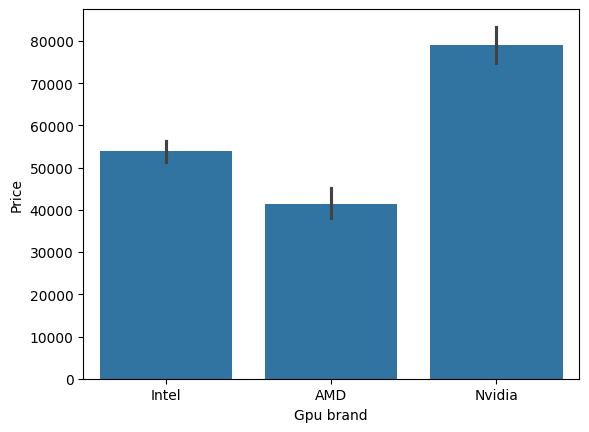

In [121]:
sns.barplot(x=data['Gpu brand'], y=data['Price'])

In [122]:
data.drop(columns=['Gpu'],inplace=True)

In [123]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


### Now, move to `OpSys` columns 

In [124]:
data['OpSys'].value_counts()

OpSys
Windows 10      1045
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

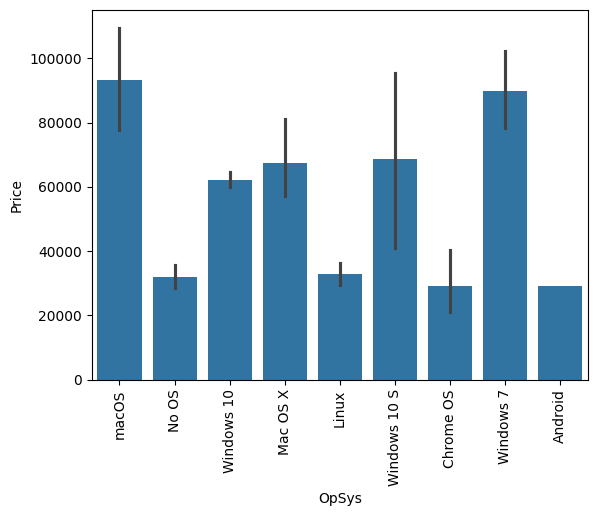

In [125]:
sns.barplot(x=data.OpSys, y=data.Price)
plt.xticks(rotation='vertical')
plt.show()

In [126]:
def categorize_OS(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [127]:
data['OS']= data['OpSys'].apply(categorize_OS)

In [128]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [129]:
data.drop(columns=['OpSys'],inplace=True)

In [130]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


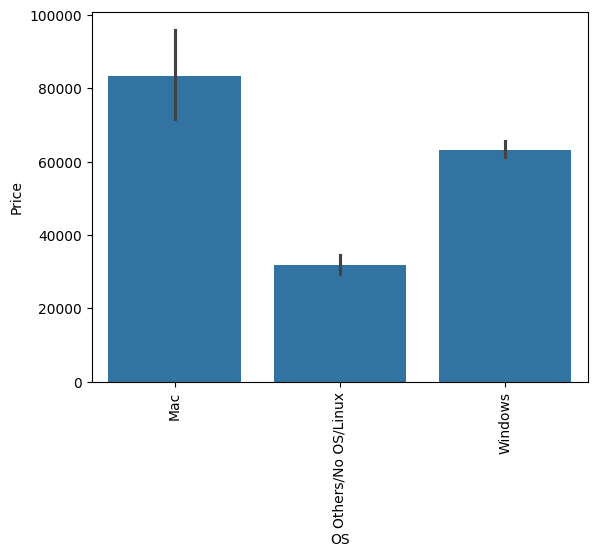

In [131]:
sns.barplot(x=data['OS'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Falcon\AppData\Local\Temp\ipykernel_7972\2799343561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

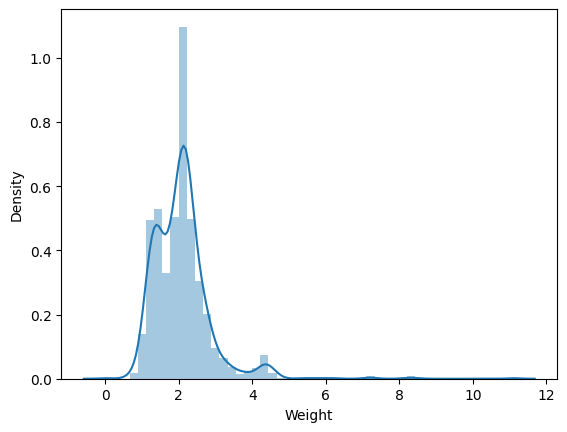

In [132]:
sns.distplot(data['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

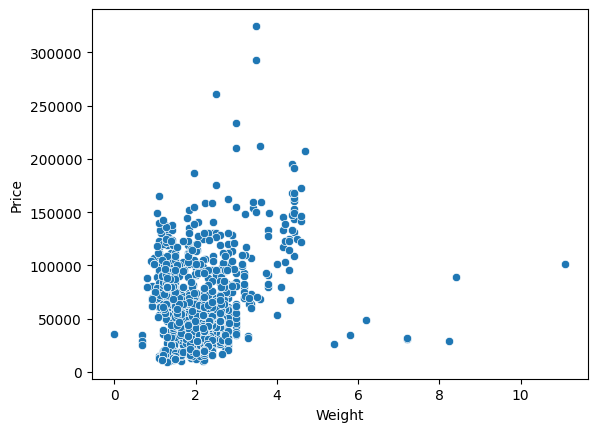

In [133]:
sns.scatterplot(x=data['Weight'], y=data['Price'])

<Axes: ylabel='Weight'>

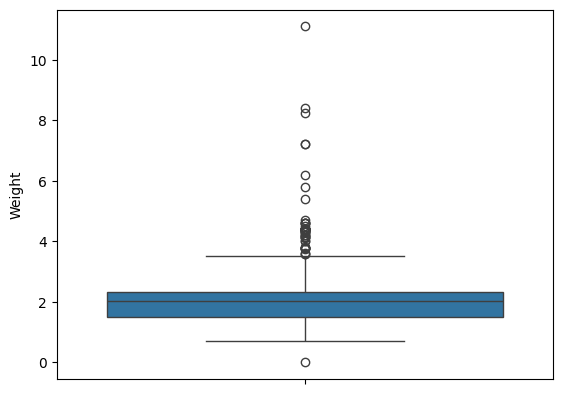

In [134]:
sns.boxplot(data['Weight'])

In [135]:
data['Weight'] = np.log(data['Weight'])

In [136]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,0.314811,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,0.292670,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,0.620576,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,0.604316,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,0.314811,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<Axes: ylabel='Weight'>

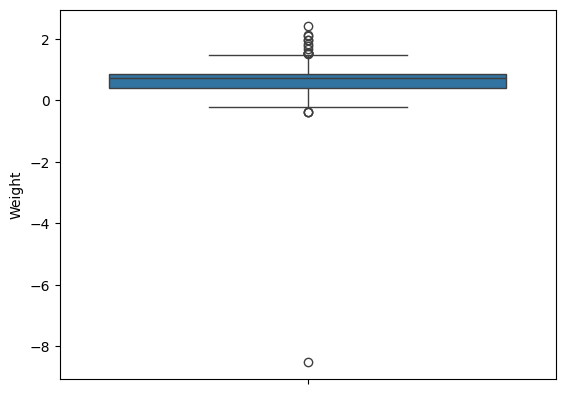

In [137]:
sns.boxplot(data['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

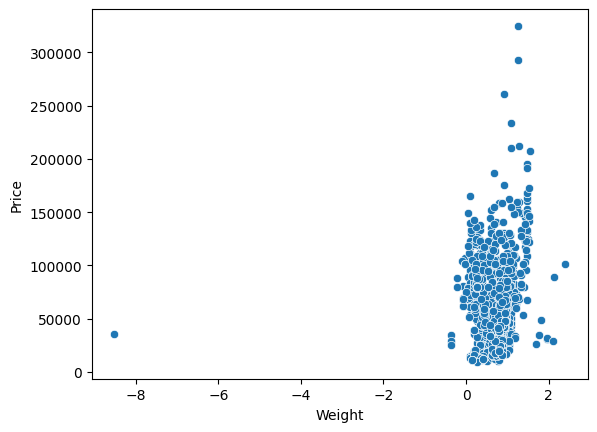

In [138]:
sns.scatterplot(x=data['Weight'], y=data['Price'])

In [139]:
data[data['Weight'] < -1]

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
349,Dell,Ultrabook,8,-8.517193,35324.64,0,0,141.211998,Intel Core i5,1000,0,AMD,Windows


Delete this row

In [140]:
data = data.drop(index=349).reset_index()

<Axes: xlabel='Weight', ylabel='Price'>

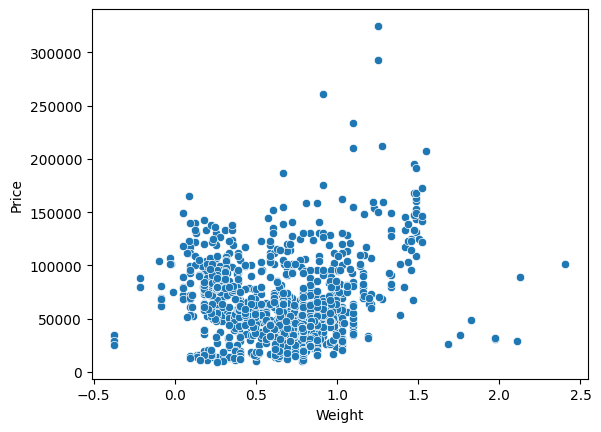

In [141]:
sns.scatterplot(x=data['Weight'], y=data['Price'])

In [142]:
numeric_cols = data.select_dtypes(include='number')
numeric_cols.corr()['Price']

index          0.066578
Ram            0.687037
Weight         0.093258
Price          1.000000
TouchScreen    0.191467
IPS            0.257106
PPI            0.471371
HDD           -0.094297
SSD            0.668810
Name: Price, dtype: float64

<Axes: >

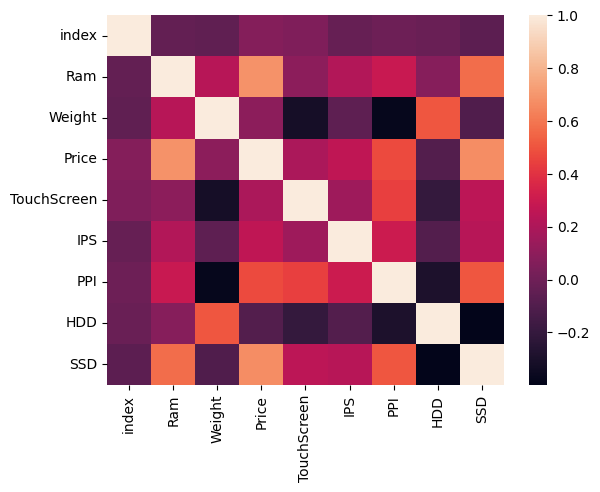

In [143]:
sns.heatmap(numeric_cols.corr())

C:\Users\Falcon\AppData\Local\Temp\ipykernel_7972\4196895882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

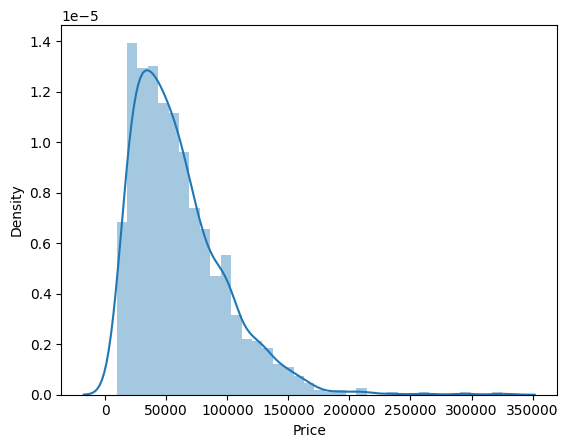

In [144]:
sns.distplot(data['Price'])

C:\Users\Falcon\AppData\Local\Temp\ipykernel_7972\460424880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['Price']))


<Axes: xlabel='Price', ylabel='Density'>

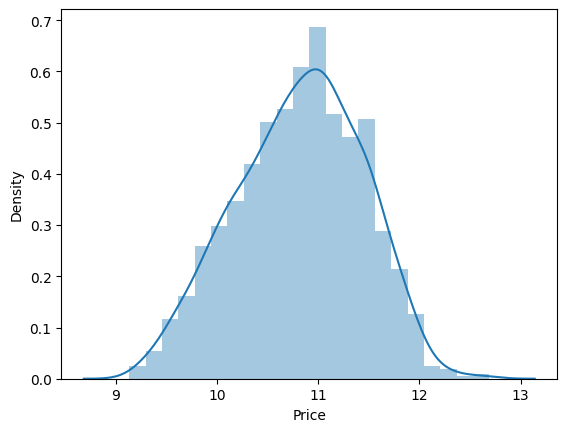

In [145]:
sns.distplot(np.log(data['Price']))

## Data splitting 

In [146]:
X = data.drop(columns=['Price','index'])
y = np.log(data['Price'])

In [147]:
X

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,0.314811,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,0.292670,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,0.620576,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,0.604316,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,0.314811,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1264,Lenovo,2 in 1 Convertible,4,0.587787,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1265,Lenovo,2 in 1 Convertible,16,0.262364,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1266,Lenovo,Notebook,2,0.405465,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1267,HP,Notebook,6,0.783902,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [148]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1264    10.433899
1265    11.288115
1266     9.409283
1267    10.614129
1268     9.886358
Name: Price, Length: 1269, dtype: float64

In [149]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [150]:
X_train

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
32,Dell,Ultrabook,16,0.182322,1,0,276.053530,Intel Core i7,0,512,Intel,Windows
156,Dell,Notebook,8,0.756122,0,0,141.211998,Intel Core i5,0,256,AMD,Windows
724,Acer,Notebook,2,0.518794,0,0,111.935204,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1037,Dell,Gaming,16,1.166271,0,0,282.423996,Intel Core i7,1000,256,Nvidia,Windows
277,Lenovo,Notebook,8,0.667829,0,1,141.211998,Intel Core i7,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1044,Lenovo,Notebook,8,1.098612,0,0,106.113062,Intel Core i5,1000,0,AMD,Windows
1095,Lenovo,2 in 1 Convertible,4,-0.371064,1,1,224.173809,Other Intel Processor,0,0,Intel,Windows
1130,MSI,Gaming,16,0.530628,0,0,157.350512,Intel Core i7,1000,256,Nvidia,Windows
860,HP,2 in 1 Convertible,4,0.246860,1,0,165.632118,Intel Core i5,0,256,Intel,Windows


#### Handling the Categorical Columns
Now, we can perform `One-Hot-Encoding`. we are going to use `Colomntransformer` and `Pipeline` 

In [151]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

Importing models or test methods 

In [152]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [153]:
X_train['Weight'].isnull().sum()

np.int64(1)

In [154]:
X_train[X_train['Weight'].isnull()]

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
201,Dell,Ultrabook,8,NaN,0,0,165.632118,Intel Core i7,0,256,Intel,Windows


In [155]:
X_train['Weight'] = X_train['Weight'].fillna(0)

In [156]:
X_train['Weight'].isnull().sum()

np.int64(0)

## Scaling 

In [157]:
from sklearn.preprocessing import StandardScaler

# Linear Regression

In [158]:
X_train.head(1)

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
32,Dell,Ultrabook,16,0.182322,1,0,276.05353,Intel Core i7,0,512,Intel,Windows


In [159]:

encoding = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11]),
        ('scaler', StandardScaler(),[2,3,4,5,6,8,9])
    ],
    remainder='passthrough'
)

lr_model = LinearRegression()

pipe = Pipeline([
    ('step-1',encoding),
    ('step-2',lr_model)
])

pipe.fit(X_train,y_train)

,steps,"[('step-1', ...), ('step-2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('col_tnf', ...), ('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Predicting or testing

In [160]:
from sklearn.metrics import r2_score,mean_absolute_error

In [161]:
y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))

R2_score 0.8275380679442952
mean_absolute_error 0.18995896605728693


Following code convert the log value into normal value by expression function  

In [162]:
np.exp(0.1899589660572979)

np.float64(1.2091999783965925)

## Ridge Model

Try diferent alpha values between 0.0 to 1.0 to train model with different penalty rate

In [163]:
ridge_model = Ridge(alpha=0.9)

ridge_pipe = Pipeline([
    ('step-1',encoding),
    ('step-2',ridge_model)
])

ridge_pipe.fit(X_train,y_train)

,steps,"[('step-1', ...), ('step-2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('col_tnf', ...), ('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [164]:
ridge_y_pred = ridge_pipe.predict(X_test)

print('R2_score',r2_score(y_test,ridge_y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,ridge_y_pred))

R2_score 0.8279207854391889
mean_absolute_error 0.1884457019497475


## Lasso Model

In [165]:
lasso_model = Lasso(alpha=0.001)

lasso_pipe = Pipeline([
    ('step-1',encoding),
    ('step-2',lasso_model)
])

lasso_pipe.fit(X_train,y_train)

,steps,"[('step-1', ...), ('step-2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('col_tnf', ...), ('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [166]:
lasso_y_pred = lasso_pipe.predict(X_test)

print('R2_score',r2_score(y_test,lasso_y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,lasso_y_pred))

R2_score 0.821418961914342
mean_absolute_error 0.1920687404265528


### Now, We are going to run for loop in train_test_split to find best split

In [167]:
X=X.dropna()

In [168]:
X.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
TouchScreen    0
IPS            0
PPI            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
OS             0
dtype: int64

In [169]:
X.shape
y=y.drop(index=201)
y.shape
# y.reset_index()
# y.isnull().sum()

(1268,)

In [170]:
cat_cols = [0, 1, 7, 10, 11]
num_cols = [2,3,4,5,6,8,9]
results = []
for i in range(1000):
    try: 
        x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=i)
        encoding = ColumnTransformer(
            transformers=[
                ('col_trf',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),cat_cols),
                ('scaler',StandardScaler(),num_cols)
            ]
        )

        l_model = LinearRegression()
        lr_pipe =Pipeline([
            ('step_1',encoding),
            ('step_2',l_model)
        ])
        lr_pipe.fit(x_train,y_train)
        # Predicting
        lr_predict = lr_pipe.predict(x_test)
        # Calculate metrics
        r2 = r2_score(y_test, lr_predict)
        mae = mean_absolute_error(y_test, lr_predict)
    
        #storing values
        results.append((i,r2,mae))
    except ValueError as e:
        print('error occur',e)

c:\Users\Falcon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Falcon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Falcon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Falcon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all

## Finding best split

In [171]:
best_split = max(results,key=lambda x:x[1])
print("Best random_state:", best_split[0])
print("Best R2 Score:", best_split[1])
print("Corresponding MAE:", best_split[2])

Best random_state: 399
Best R2 Score: 0.8759720098199589
Corresponding MAE: 0.17898962224830842


#### Performing `random_state=399` split on different algorithms 

In [172]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=399)
encoding = ColumnTransformer(
            transformers=[
                ('col_trf',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),cat_cols),
                ('scaler',StandardScaler(),num_cols)
            ]
        )

## Ridge Regression

In [173]:
ridge_model2 = Ridge(alpha=0.9)

ridge_pipe2 = Pipeline([
    ('step-1',encoding),
    ('step-2',ridge_model2)
])

ridge_pipe2.fit(x_train,y_train)

,steps,"[('step-1', ...), ('step-2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('col_trf', ...), ('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [174]:
ridge_y_pred2 = ridge_pipe2.predict(x_test)

print('R2_score',r2_score(y_test,ridge_y_pred2))
print('mean_absolute_error',mean_absolute_error(y_test,ridge_y_pred2))

R2_score 0.8747723238865581
mean_absolute_error 0.17977997903252568


## Lasso Regression

In [175]:
lasso_model2 = Lasso(alpha=0.001)

lasso_pipe2 = Pipeline([
    ('step-1',encoding),
    ('step-2',lasso_model2)
])

lasso_pipe2.fit(x_train,y_train)

,steps,"[('step-1', ...), ('step-2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('col_trf', ...), ('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [176]:
lasso_y_pred2 = lasso_pipe2.predict(x_test)

print('R2_score',r2_score(y_test,lasso_y_pred2))
print('mean_absolute_error',mean_absolute_error(y_test,lasso_y_pred2))

R2_score 0.8664901655429158
mean_absolute_error 0.18470018905032387


## Saving Data Frame

In [177]:
# data.to_csv('final_data.csv',index=False)
training_data = pd.concat([x_train,y_train],axis=1)

In [178]:
training_data # Index is change or looks informat due to split method

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS,Price
243,Asus,Gaming,16,1.458615,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows,11.470547
551,Dell,Ultrabook,8,0.190620,1,1,331.264236,Intel Core i5,0,128,Intel,Windows,11.352695
1236,Lenovo,2 in 1 Convertible,4,0.587787,1,1,157.350512,Intel Core i7,0,128,Intel,Windows,10.433899
305,Asus,2 in 1 Convertible,2,0.095310,1,0,135.094211,Other Intel Processor,0,0,Intel,Windows,9.592332
373,Lenovo,Ultrabook,8,0.122218,0,1,209.800683,Intel Core i7,0,512,Intel,Windows,11.708369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Dell,Notebook,4,0.810930,0,0,100.454670,Intel Core i3,1000,0,Intel,Others/No OS/Linux,9.858883
1218,Lenovo,Notebook,6,0.875469,0,0,141.211998,Intel Core i3,0,128,Nvidia,Windows,10.319441
886,HP,Ultrabook,8,0.086178,1,0,352.465147,Other Intel Processor,0,240,Intel,Windows,12.014718
676,Acer,Netbook,4,0.336472,0,0,135.094211,Other Intel Processor,0,0,Intel,Windows,9.570272


# Save the training dataset 
Here, if you want you can reset the format(index) by using reset_index() method. But i am not going to do this.

In [179]:
training_data.to_csv('training_data.csv',index=False)

## Exporting Model

In [180]:
import pickle

In [181]:
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(lr_pipe,open('lr_pipe.pkl','wb'))

In [182]:
data

,index,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,0,Apple,Ultrabook,8,0.314811,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,0.292670,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,0.620576,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,0.604316,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,0.314811,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1298,Lenovo,2 in 1 Convertible,4,0.587787,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1265,1299,Lenovo,2 in 1 Convertible,16,0.262364,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1266,1300,Lenovo,Notebook,2,0.405465,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1267,1301,HP,Notebook,6,0.783902,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


### Save all the commands that used for this project or creating our Linear Regression model. 

In [183]:
save commands

Operation cancelled.


In [184]:
x_train.head()


,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
243,Asus,Gaming,16,1.458615,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows
551,Dell,Ultrabook,8,0.190620,1,1,331.264236,Intel Core i5,0,128,Intel,Windows
1236,Lenovo,2 in 1 Convertible,4,0.587787,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
305,Asus,2 in 1 Convertible,2,0.095310,1,0,135.094211,Other Intel Processor,0,0,Intel,Windows
373,Lenovo,Ultrabook,8,0.122218,0,1,209.800683,Intel Core i7,0,512,Intel,Windows


In [186]:
query = pd.DataFrame([{
    'Company': 'HP',
    'TypeName': 'Notebook',
    'Ram': 16,
    'Weight': 1.45,
    'TouchScreen': 0,
    'IPS': 1,
    'PPI': 127.335675,
    'Cpu brand': 'AMD Processor',
    'HDD': 0,
    'SSD': 512,
    'Gpu brand': 'AMD',
    'OS': 'Window'
    }])
lr_pipe.predict(query)

c:\Users\Falcon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([10.8149807])